In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

1. Data preparation and research.

In [2]:
df = pd.read_csv("C:\\Users\\Admin\\OneDrive\\Desktop\\Capstone Project 2\\Youth_Tobacco_Survey_Data.csv")

In [3]:
df.head()

YEAR LocationAbbr   LocationDesc                  TopicType  \
0  2004           OH           Ohio  Tobacco Use – Survey Data   
1  2008           AL        Alabama  Tobacco Use – Survey Data   
2  2015           WV  West Virginia  Tobacco Use – Survey Data   
3  2005           IL       Illinois  Tobacco Use – Survey Data   
4  2005           CT    Connecticut  Tobacco Use – Survey Data   

                       TopicDesc     MeasureDesc DataSource  Response  \
0          Cigarette Use (Youth)  Smoking Status        YTS      Ever   
1          Cigarette Use (Youth)  Smoking Status        YTS      Ever   
2  Smokeless Tobacco Use (Youth)     User Status        YTS  Frequent   
3          Cigarette Use (Youth)  Smoking Status        YTS      Ever   
4  Smokeless Tobacco Use (Youth)     User Status        YTS      Ever   

  Data_Value_Unit Data_Value_Type  ...                    GeoLocation  \
0               %      Percentage  ...  (40.060210141, -82.404260056)   
1               %      Percentage  ...  (32.840571122, -86.631860762)   
2               %      Percentage  ...  (38.665510202, -80.712640135)   
3               %      Percentage  ...  (40.485010283, -88.997710178)   
4               %      Percentage  ...   (41.56266102, -72.649840952)   

  TopicTypeId TopicId  MeasureId  StratificationID1  StratificationID2  \
0         BEH  106BEH     166SSA               1GEN               8AGE   
1         BEH  106BEH     166SSA               3GEN               8AGE   
2         BEH  151BEH     169USS               2GEN               8AGE   
3         BEH  106BEH     166SSA               1GEN               8AGE   
4         BEH  151BEH     169USS               2GEN               8AGE   

   StratificationID3 StratificationID4 SubMeasureID DisplayOrder  
0               6RAC              1EDU        YTS08            8  
1               6RAC              2EDU        YTS08            8  
2               6RAC              2EDU        YTS12           12  
3               6RAC              1EDU        YTS08            8  
4               6RAC              2EDU        YTS11           11  

[5 rows x 31 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        10600 non-null  int64  
 1   LocationAbbr                10600 non-null  object 
 2   LocationDesc                10600 non-null  object 
 3   TopicType                   10600 non-null  object 
 4   TopicDesc                   10600 non-null  object 
 5   MeasureDesc                 10600 non-null  object 
 6   DataSource                  10600 non-null  object 
 7   Response                    8190 non-null   object 
 8   Data_Value_Unit             10600 non-null  object 
 9   Data_Value_Type             10600 non-null  object 
 10  Data_Value                  10080 non-null  float64
 11  Data_Value_Footnote_Symbol  517 non-null    object 
 12  Data_Value_Footnote         517 non-null    object 
 13  Data_Value_Std_Err          100

In [5]:
df.isna().sum()

YEAR                              0
LocationAbbr                      0
LocationDesc                      0
TopicType                         0
TopicDesc                         0
MeasureDesc                       0
DataSource                        0
Response                       2410
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                      520
Data_Value_Footnote_Symbol    10083
Data_Value_Footnote           10083
Data_Value_Std_Err              520
Low_Confidence_Limit            517
High_Confidence_Limit           520
Sample_Size                     520
Gender                            0
Race                              0
Age                               0
Education                         0
GeoLocation                       4
TopicTypeId                       0
TopicId                           0
MeasureId                         0
StratificationID1                 0
StratificationID2                 0
StratificationID3           

In [6]:
df.nunique()

YEAR                            19
LocationAbbr                    50
LocationDesc                    50
TopicType                        1
TopicDesc                        3
MeasureDesc                      4
DataSource                       2
Response                         3
Data_Value_Unit                  1
Data_Value_Type                  1
Data_Value                     750
Data_Value_Footnote_Symbol       1
Data_Value_Footnote              1
Data_Value_Std_Err             111
Low_Confidence_Limit           688
High_Confidence_Limit          844
Sample_Size                   2625
Gender                           3
Race                             1
Age                              1
Education                        2
GeoLocation                     50
TopicTypeId                      1
TopicId                          3
MeasureId                        4
StratificationID1                3
StratificationID2                1
StratificationID3                1
StratificationID4   

In [7]:
df.describe()

YEAR    Data_Value  Data_Value_Std_Err  Low_Confidence_Limit  \
count  10600.000000  10080.000000        10080.000000          10083.000000   
mean    2007.053491     20.336806            1.851429             16.715253   
std        5.462656     21.168271            1.777441             18.575128   
min     1999.000000      0.000000            0.000000              0.000000   
25%     2002.000000      3.000000            0.600000              1.700000   
50%     2006.000000     10.550000            1.300000              7.900000   
75%     2011.000000     36.425000            2.400000             29.600000   
max     2017.000000     98.000000           16.100000             97.600000   

       High_Confidence_Limit   Sample_Size  DisplayOrder  
count           10080.000000  10080.000000  10600.000000  
mean               23.961806   1483.412897      8.106887  
std                23.981915   2189.565233      3.076806  
min                 0.000000     50.000000      1.000000  
25%                 4.300000    671.000000      7.000000  
50%                13.200000   1001.000000      9.000000  
75%                42.500000   1642.000000     11.000000  
max                98.400000  36910.000000     12.000000

In [8]:
#Rename the Data_Value column and add the unit of measurement (%) to the name. 
#Thus, we get rid of unnecessary columns Data_Value_Unit and Data_Value_Type.

df.rename(columns={'Data_Value': 'Tobacco consumption percentage (%)'}, inplace=True)

In [9]:
df.columns

Index(['YEAR', 'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc',
       'MeasureDesc', 'DataSource', 'Response', 'Data_Value_Unit',
       'Data_Value_Type', 'Tobacco consumption percentage (%)',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Data_Value_Std_Err', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Sample_Size', 'Gender', 'Race', 'Age', 'Education', 'GeoLocation',
       'TopicTypeId', 'TopicId', 'MeasureId', 'StratificationID1',
       'StratificationID2', 'StratificationID3', 'StratificationID4',
       'SubMeasureID', 'DisplayOrder'],
      dtype='object')

In [10]:
# Definition of variables for further work.

df = df[['YEAR', 'LocationDesc', 'TopicDesc',
       'MeasureDesc', 'Response', 'Tobacco consumption percentage (%)', 'Data_Value_Std_Err', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Sample_Size', 'Gender',
       'Education', 'DisplayOrder']]

In [11]:
df.dropna(subset=['Tobacco consumption percentage (%)', 'Data_Value_Std_Err', 'Low_Confidence_Limit', 
                   'High_Confidence_Limit', 'Sample_Size', 'Response'], inplace=True)

In [12]:
df['Gender'].value_counts()

Gender
Overall    2729
Female     2729
Male       2729
Name: count, dtype: int64

In [13]:
#The 'Gender' column is divided into exactly three parts. Let's assume the survey was split equally between genders. 
#This means we'll create masks for half of the 'Overall' values, and assign them the values 'Male' and 'Female'.

mask = np.random.choice([True, False], size=len(df))


df.loc[mask, 'Gender'] = 'Male'


df.loc[~mask, 'Gender'] = 'Female'

In [14]:
df['Gender'].value_counts()

Gender
Male      4111
Female    4076
Name: count, dtype: int64

In [15]:
df.isna().sum()

YEAR                                  0
LocationDesc                          0
TopicDesc                             0
MeasureDesc                           0
Response                              0
Tobacco consumption percentage (%)    0
Data_Value_Std_Err                    0
Low_Confidence_Limit                  0
High_Confidence_Limit                 0
Sample_Size                           0
Gender                                0
Education                             0
DisplayOrder                          0
dtype: int64

In [16]:
df.head()

YEAR   LocationDesc                      TopicDesc     MeasureDesc  \
0  2004           Ohio          Cigarette Use (Youth)  Smoking Status   
1  2008        Alabama          Cigarette Use (Youth)  Smoking Status   
2  2015  West Virginia  Smokeless Tobacco Use (Youth)     User Status   
3  2005       Illinois          Cigarette Use (Youth)  Smoking Status   
4  2005    Connecticut  Smokeless Tobacco Use (Youth)     User Status   

   Response  Tobacco consumption percentage (%)  Data_Value_Std_Err  \
0      Ever                                32.2                 3.2   
1      Ever                                47.8                 2.9   
2  Frequent                                12.7                 1.9   
3      Ever                                28.5                 2.2   
4      Ever                                20.5                 2.3   

   Low_Confidence_Limit  High_Confidence_Limit  Sample_Size  Gender  \
0                  25.8                   38.5       1377.0    Male   
1                  42.1                   53.5        654.0    Male   
2                   9.0                   16.4        781.0  Female   
3                  24.2                   32.8       1323.0    Male   
4                  16.0                   25.1        973.0    Male   

       Education  DisplayOrder  
0  Middle School             8  
1    High School             8  
2    High School            12  
3  Middle School             8  
4    High School            11

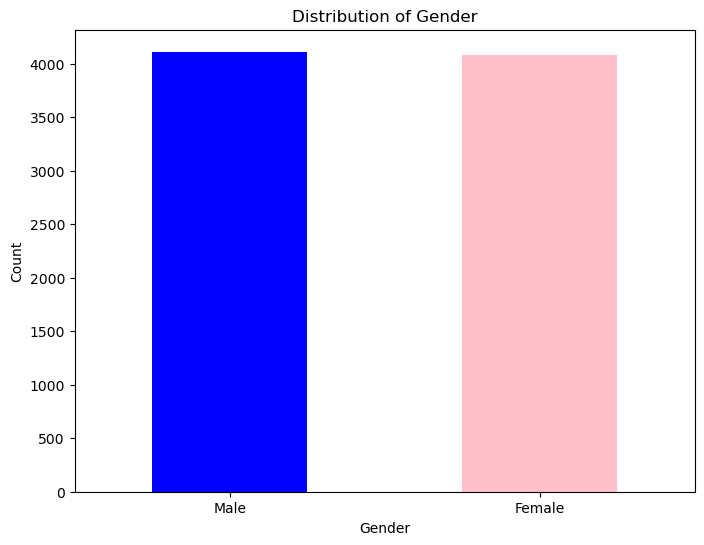

In [17]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

2. Visualization.

In [18]:
plt.figure(figsize=(8, 6), dpi=130)
custom_palette = {'Male': 'navy', 'Female': 'lightcoral'}
sns.scatterplot(data=df, x='Sample_Size', y='Tobacco consumption percentage (%)', hue='Gender', palette=custom_palette)
plt.title('Scatterplot: Sample_Size vs Tobacco consumption percentage (%)')
plt.xlabel('Sample_Size')
plt.ylabel('Tobacco consumption percentage (%)');

In [19]:
plt.figure(figsize=(10, 6), dpi=150)
sns.boxplot(data=df, x='Education', y='Tobacco consumption percentage (%)', hue='Gender', palette='Paired')
plt.xlabel('Education')
plt.ylabel('Tobacco consumption percentage (%)')
plt.title('Distribution of tobacco consumption by education level')
plt.xticks(rotation=90);

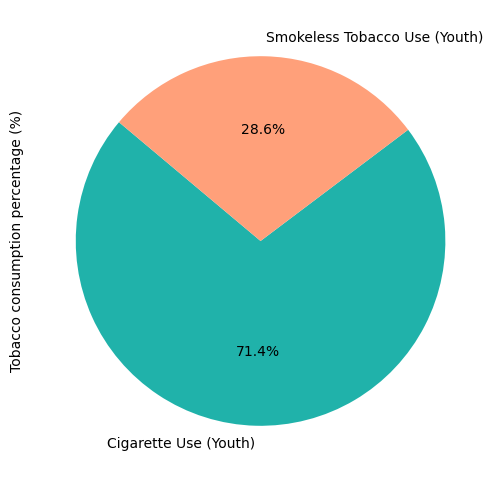

In [20]:
plt.figure(figsize=(6, 6))
df.groupby('TopicDesc')['Tobacco consumption percentage (%)'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140,
                        colors=['lightseagreen', 'lightsalmon']);

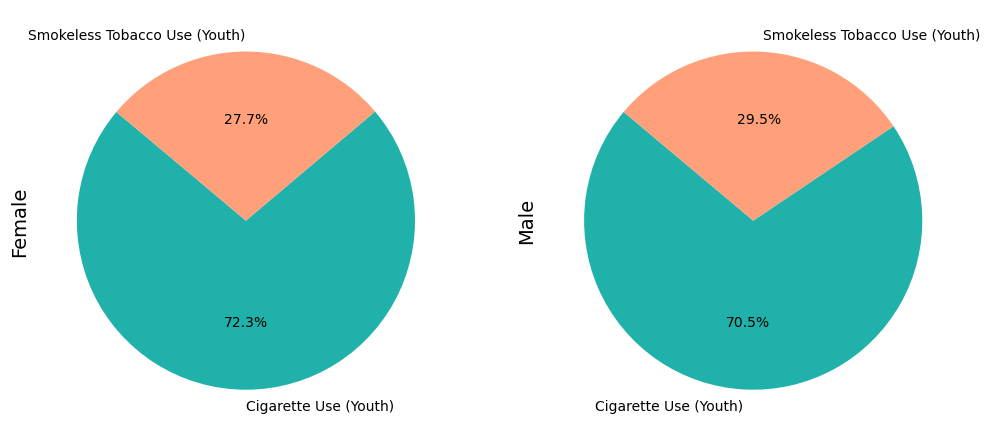

In [21]:
female_data = df[df['Gender'] == 'Female']
male_data = df[df['Gender'] == 'Male']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

female_data.groupby('TopicDesc')['Tobacco consumption percentage (%)'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                    ax=axes[0], colors=['lightseagreen', 'lightsalmon'])
axes[0].set_ylabel('Female', fontsize=14)

male_data.groupby('TopicDesc')['Tobacco consumption percentage (%)'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                    ax=axes[1], colors=['lightseagreen', 'lightsalmon'])
axes[1].set_ylabel('Male', fontsize=14);

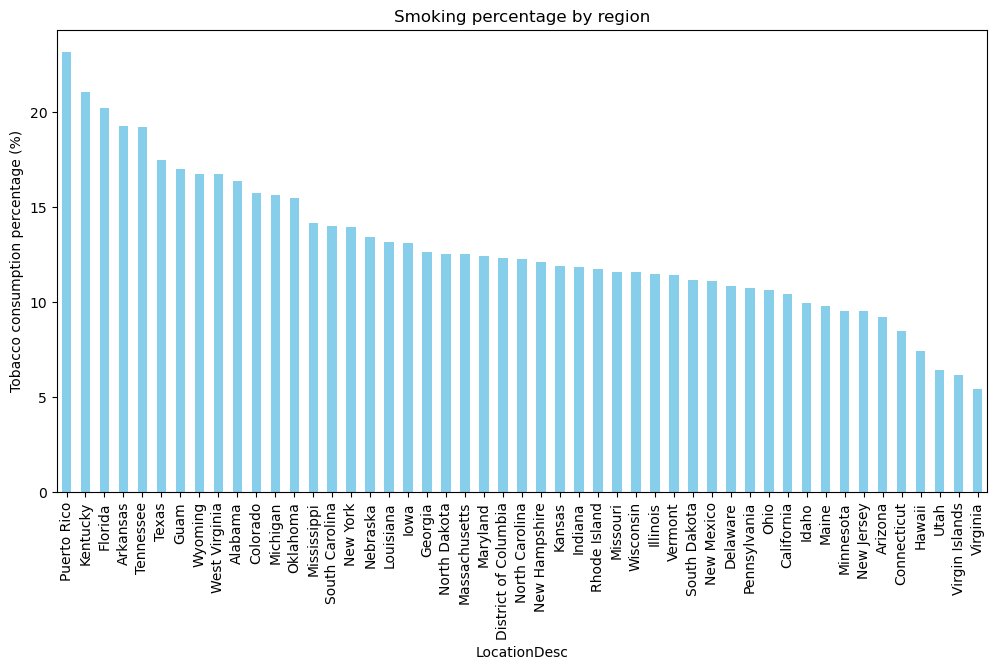

In [22]:
region_smoking = df.groupby('LocationDesc')['Tobacco consumption percentage (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
region_smoking.plot(kind='bar', color='skyblue')
plt.title('Smoking percentage by region')
plt.ylabel('Tobacco consumption percentage (%)')
plt.xlabel('LocationDesc')
plt.xticks(rotation=90);

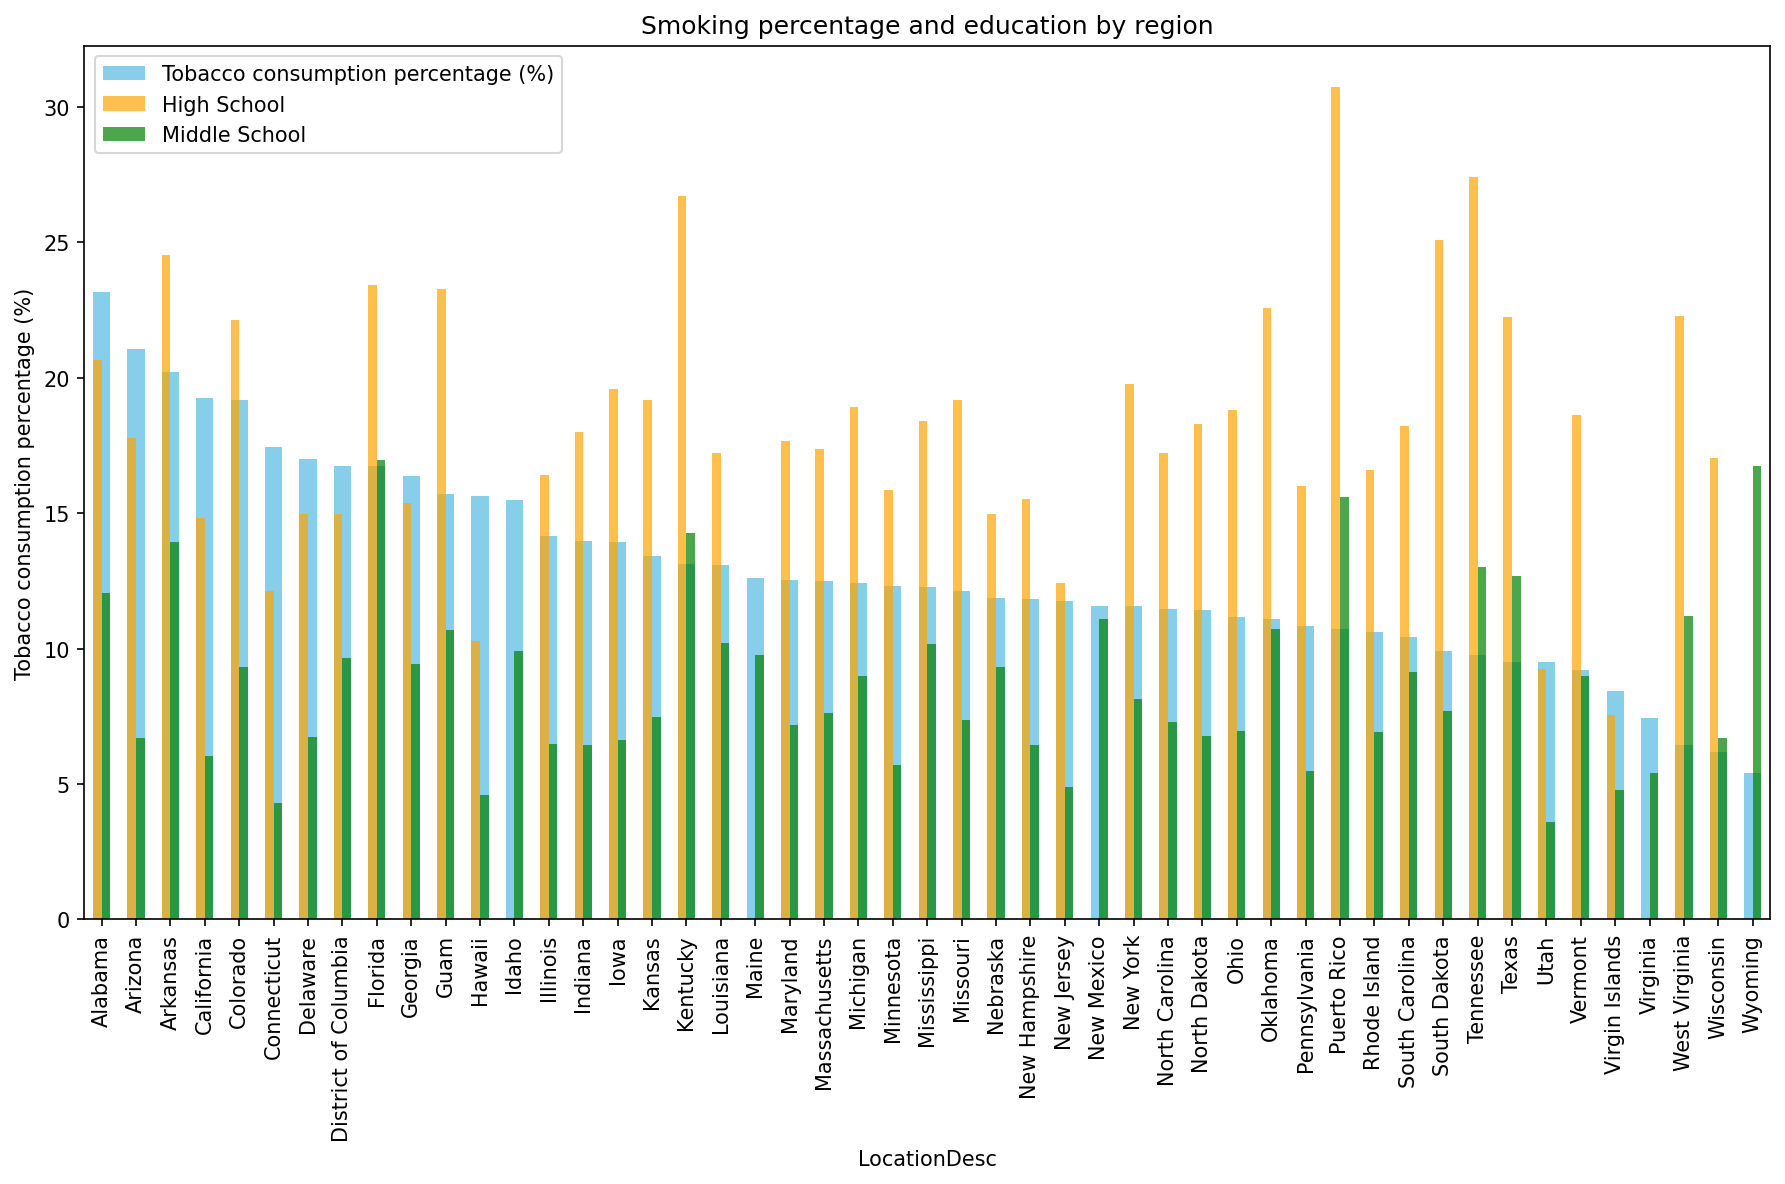

In [23]:
region_smoking = df.groupby('LocationDesc')['Tobacco consumption percentage (%)'].mean().sort_values(ascending=False)

education_smoking = df.groupby(['LocationDesc', 'Education'])['Tobacco consumption percentage (%)'].mean().unstack()

plt.figure(figsize=(12, 8), dpi=150)
region_smoking.plot(kind='bar', color='skyblue', label='Tobacco consumption percentage (%)')

education_smoking.plot(kind='bar', ax=plt.gca(), color=['orange', 'green'], alpha=0.7)

plt.title('Smoking percentage and education by region')
plt.xlabel('LocationDesc')
plt.ylabel('Tobacco consumption percentage (%)')
plt.xticks(rotation=90)  # Rotate region labels for better readability
plt.legend(['Tobacco consumption percentage (%)', 'High School', 'Middle School'])
plt.tight_layout()
plt.show()

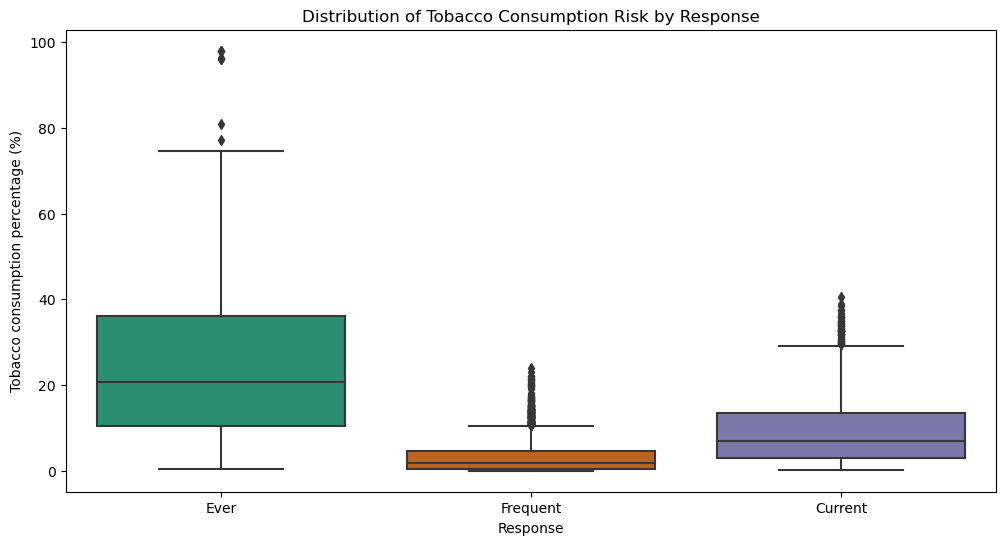

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Response', y='Tobacco consumption percentage (%)', palette='Dark2')
plt.title('Distribution of Tobacco Consumption Risk by Response')
plt.xlabel('Response')
plt.ylabel('Tobacco consumption percentage (%)');

In [25]:
plt.figure(figsize=(12, 6), dpi=150)
sns.barplot(data=df, x='YEAR', y='Tobacco consumption percentage (%)', hue='TopicDesc')
plt.xlabel('YEAR')
plt.ylabel('Tobacco consumption percentage (%)')
plt.title('Сomparison of tobacco consumption by different types')
plt.xticks(rotation=90)
plt.legend(title='TopicDesc')
plt.legend(loc=(1.01, 0.7));

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix');

High correlation between the 'Tobacco consumption percentage (%)' and the lower and upper levels of the confidence interval ('Low_Confidence_Limit', 'High_Confidence_Limit'). This may mean that the percentage of tobacco use increases with the level of confidence in that percentage. This is not surprising since confidence intervals are largely determined by the percentage itself and its standard error.

In [27]:
df.columns

Index(['YEAR', 'LocationDesc', 'TopicDesc', 'MeasureDesc', 'Response',
       'Tobacco consumption percentage (%)', 'Data_Value_Std_Err',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'Gender', 'Education', 'DisplayOrder'],
      dtype='object')

In [28]:
categorical_features = ['TopicDesc', 'MeasureDesc', 'Response', 'Education', 'Gender']

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [29]:
df.head()

YEAR   LocationDesc  Tobacco consumption percentage (%)  \
0  2004           Ohio                                32.2   
1  2008        Alabama                                47.8   
2  2015  West Virginia                                12.7   
3  2005       Illinois                                28.5   
4  2005    Connecticut                                20.5   

   Data_Value_Std_Err  Low_Confidence_Limit  High_Confidence_Limit  \
0                 3.2                  25.8                   38.5   
1                 2.9                  42.1                   53.5   
2                 1.9                   9.0                   16.4   
3                 2.2                  24.2                   32.8   
4                 2.3                  16.0                   25.1   

   Sample_Size  DisplayOrder  TopicDesc_Smokeless Tobacco Use (Youth)  \
0       1377.0             8                                    False   
1        654.0             8                                    False   
2        781.0            12                                     True   
3       1323.0             8                                    False   
4        973.0            11                                     True   

   MeasureDesc_User Status  Response_Ever  Response_Frequent  \
0                    False           True              False   
1                    False           True              False   
2                     True          False               True   
3                    False           True              False   
4                     True           True              False   

   Education_Middle School  Gender_Male  
0                     True         True  
1                    False         True  
2                    False        False  
3                     True         True  
4                    False         True

3. Dividing data into training and test sets to train the model and evaluate its quality.

In [30]:
X = df.drop(['Tobacco consumption percentage (%)', 'YEAR', 'LocationDesc'], axis=1)

In [31]:
y = df['Tobacco consumption percentage (%)']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [34]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (6549, 11)
Shape of X_test: (1638, 11)
Shape of y_train: (6549,)
Shape of y_test: (1638,)


train and test

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def result_for_train_data(y_train, y_train_pred):
    print('Training set evaluation result :\n')
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    print("Mean Absolute Error (Train): ", mae_train*100)
    print("Mean Squared Error (Train): ", mse_train*100)
    print("R^2 Score (Train): ", r2_train*100)
    print()

In [54]:
def result_for_test_data(y_test, y_test_pred):
    print('Test set evaluation result :\n')
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print("Mean Absolute Error (Test): ", mae_test*100)
    print("Mean Squared Error (Test): ", mse_test*100)
    print("R^2 Score (Test): ", r2_test*100)

In [55]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
print(model_lr)

y_train_pred_lr = model_lr.predict(X_train)
y_test_pred_lr = model_lr.predict(X_test)

LinearRegression()


In [56]:
print(model_lr)
result_for_train_data(y_train, y_train_pred_lr)
result_for_test_data(y_test, y_test_pred_lr)

LinearRegression()
Training set evaluation result :

Mean Absolute Error (Train):  2.1361969556137286
Mean Squared Error (Train):  0.11664369723543579
R^2 Score (Train):  99.99947326598243

Test set evaluation result :

Mean Absolute Error (Test):  2.0689551921605553
Mean Squared Error (Test):  0.1038282260238485
R^2 Score (Test):  99.99951346992731


In [57]:
from sklearn.ensemble import RandomForestRegressor
model_rff = RandomForestRegressor()
model_rff.fit(X_train, y_train)
print(model_rff)

y_train_pred_rff = model_rff.predict(X_train)
y_test_pred_rff = model_rff.predict(X_test)

RandomForestRegressor()


In [58]:
print(model_rff)
result_for_train_data(y_train, y_train_pred_rff)

result_for_test_data(y_test, y_test_pred_rff)

RandomForestRegressor()
Training set evaluation result :

Mean Absolute Error (Train):  2.308031760574134
Mean Squared Error (Train):  0.38057176668193926
R^2 Score (Train):  99.99828143225575

Test set evaluation result :

Mean Absolute Error (Test):  5.6722222222222225
Mean Squared Error (Test):  1.5128730769230843
R^2 Score (Test):  99.99291080781897


In [59]:
from sklearn.svm import SVR

# Create the SVR model
model_svr = SVR()

# Train the SVR model
model_svr.fit(X_train, y_train)

# Print the SVR model (optional)
print(model_svr)

# Predict on the training set and test set
y_train_pred_svr = model_svr.predict(X_train)
y_test_pred_svr = model_svr.predict(X_test)

SVR()


In [60]:
print(model_svr)
result_for_train_data(y_train, y_train_pred_svr)

result_for_test_data(y_test, y_test_pred_svr)

SVR()
Training set evaluation result :

Mean Absolute Error (Train):  973.4075748132046
Mean Squared Error (Train):  23650.654497937045
R^2 Score (Train):  -6.80049207233242

Test set evaluation result :

Mean Absolute Error (Test):  962.2617593975908
Mean Squared Error (Test):  22615.156082797963
R^2 Score (Test):  -5.9726622943620855


In [61]:
from sklearn.neighbors import KNeighborsRegressor

# Create the KNN regressor model
model_knn = KNeighborsRegressor()

# Train the KNN regressor model
model_knn.fit(X_train, y_train)

print(model_knn)

# Predict on the training set and test set
y_train_pred_knn = model_knn.predict(X_train)
y_test_pred_knn = model_knn.predict(X_test)

KNeighborsRegressor()


In [62]:
print(model_knn)
result_for_train_data(y_train, y_train_pred_knn)

result_for_test_data(y_test, y_test_pred_knn)

KNeighborsRegressor()
Training set evaluation result :

Mean Absolute Error (Train):  144.1713238662391
Mean Squared Error (Train):  1419.5912719499158
R^2 Score (Train):  93.58947777115159

Test set evaluation result :

Mean Absolute Error (Test):  158.32356532356533
Mean Squared Error (Test):  1358.1098656898657
R^2 Score (Test):  93.63601481995222


In [63]:
from sklearn.linear_model import Ridge

# Create the Ridge regressor model
model_ridge = Ridge()

# Train the Ridge regressor model
model_ridge.fit(X_train, y_train)

print(model_ridge)

# Predict on the training set and test set
y_train_pred_ridge = model_ridge.predict(X_train)
y_test_pred_ridge = model_ridge.predict(X_test)

Ridge()


In [64]:
print(model_ridge)
result_for_train_data(y_train, y_train_pred_ridge)

result_for_test_data(y_test, y_test_pred_ridge)

Ridge()
Training set evaluation result :

Mean Absolute Error (Train):  2.0859246425214044
Mean Squared Error (Train):  0.11683993890661185
R^2 Score (Train):  99.9994723798037

Test set evaluation result :

Mean Absolute Error (Test):  2.0169884913840703
Mean Squared Error (Test):  0.10327161229667339
R^2 Score (Test):  99.99951607817101


In [65]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the Gradient Boosting regressor model
model_gb = GradientBoostingRegressor()

# Train the Gradient Boosting regressor model
model_gb.fit(X_train, y_train)

print(model_gb)

# Predict on the training set and test set
y_train_pred_gb = model_gb.predict(X_train)
y_test_pred_gb = model_gb.predict(X_test)

GradientBoostingRegressor()


In [66]:
print(model_gb)
result_for_train_data(y_train, y_train_pred_gb)

result_for_test_data(y_test, y_test_pred_gb)

GradientBoostingRegressor()
Training set evaluation result :

Mean Absolute Error (Train):  10.85105526117894
Mean Squared Error (Train):  2.3348274246539087
R^2 Score (Train):  99.98945649821746

Test set evaluation result :

Mean Absolute Error (Test):  12.541480732890872
Mean Squared Error (Test):  4.195303503652577
R^2 Score (Test):  99.98034117121335


scaling

In [68]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create and train SVR model on scaled data
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_test_pred = svr_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Mean Absolute Error (Test):", mae*100)
print("Mean Squared Error (Test):", mse*100)
print("R^2 Score (Test):", r2*100)


Mean Absolute Error (Test): 30.292925452108566
Mean Squared Error (Test): 130.6570058194342
R^2 Score (Test): 99.3877525893077


6. Conclusion.

Having studied various aspects of tobacco consumption among young people, including the distribution of the percentage of tobacco consumption by various regions, education, gender and other characteristics, we built a model for predicting tobacco consumption that takes into account these factors, which allows us to assess their influence on this indicator with sufficient accuracy. The coefficient of determination (R^2) is very close to 1, which indicates the high efficiency and accuracy of the model. The average absolute error is approximately 0.054 and indicates that the model deviates by this amount on average. The findings may be useful for developing targeted programs to combat tobacco dependence and improve public health. From the analysis we see that over the period from 1999 to 2017, the number of smokers among young people decreased by almost three times. This fact cannot but rejoice. We also see significant differences in youth smoking rates between different states. Which gives us food for further research. For example, income by state, availability of tobacco products (price and taxes on tobacco products), social factors (cultural traditions), stress level, etc.